In [1]:
import tensorflow as tf  # importing the libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import random
import shutil
from sklearn.model_selection import train_test_split

In [2]:
data_dir = 'F:/4th year/Research Project/Data-image'
img_width, img_height = 150, 150
num_classes = 5
validation_ratio = 0.2

In [3]:
train_dir = 'train'
validation_dir = 'validation'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [4]:
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        random.shuffle(images)
        train_images, validation_images = train_test_split(images, test_size=validation_ratio)

        for image_name in train_images:
            src = os.path.join(class_dir, image_name)
            dst = os.path.join(train_dir, class_name, image_name)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copyfile(src, dst)

        for image_name in validation_images:
            src = os.path.join(class_dir, image_name)
            dst = os.path.join(validation_dir, class_name, image_name)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copyfile(src, dst)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 2000 images belonging to 5 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 500 images belonging to 5 classes.


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
62/62 [==============================] - 337s 5s/step - loss: 0.7640 - accuracy: 0.6972 - val_loss: 0.5793 - val_accuracy: 0.7937
Epoch 2/10
62/62 [==============================] - 448s 7s/step - loss: 0.5219 - accuracy: 0.8069 - val_loss: 0.4120 - val_accuracy: 0.8500
Epoch 3/10
62/62 [==============================] - 309s 5s/step - loss: 0.3854 - accuracy: 0.8542 - val_loss: 0.4997 - val_accuracy: 0.7771
Epoch 4/10
62/62 [==============================] - 356s 6s/step - loss: 0.3558 - accuracy: 0.8770 - val_loss: 0.3438 - val_accuracy: 0.8833
Epoch 5/10
62/62 [==============================] - 396s 6s/step - loss: 0.3196 - accuracy: 0.8831 - val_loss: 0.2122 - val_accuracy: 0.9125
Epoch 6/10
62/62 [==============================] - 307s 5s/step - loss: 0.2615 - accuracy: 0.9035 - val_loss: 0.2915 - val_accuracy: 0.9021
Epoch 7/10
62/62 [==============================] - 329s 5s/step - loss: 0.2660 - accuracy: 0.9075 - val_loss: 0.1388 - val_accuracy: 0.9521
Epoch 8/10
62

In [13]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

16/16 [==============================] - 97s 6s/step - loss: 0.1038 - accuracy: 0.9560
Test Loss: 0.10382512956857681
Test Accuracy: 0.9559999704360962


In [17]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

16/16 [==============================] - 56s 3s/step


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
cm = confusion_matrix(true_classes, predicted_classes)

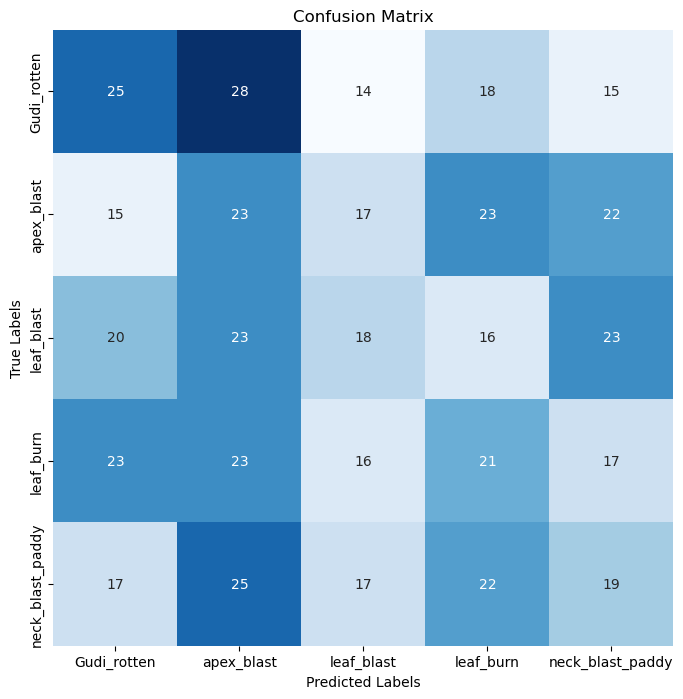

In [24]:
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
model.save('F:/4th year/Research Project/PP1/Trained Models/final.h5')

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


In [27]:
model = load_model('F:/4th year/Research Project/PP1/Trained Models/final.h5')

In [73]:
image_path = 'F:/4th year/Research Project/Data-image/neck_bl.jpg'


In [75]:
image = load_img(image_path, target_size=(img_width, img_height))
image_array = img_to_array(image)
image_array = image_array / 255.0  
image_array = np.expand_dims(image_array, axis=0)

In [76]:
predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class label:", predicted_class_label)

1/1 [==============================] - 0s 25ms/step
Predicted class label: neck_blast_paddy


In [56]:
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())